# import library

In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

## functions

In [20]:
def logisticReg(X, y):
    log_reg = LogisticRegression()
    log_reg.fit(X, y)
    w = log_reg.coef_[0]
    b = log_reg.intercept_
    return log_reg, w, b


def data_plot_reg(point, label, w, b, title):
    df = pd.DataFrame(np.concatenate([point, np.array([label]).T], axis=1),
                      columns=['x1', 'x2', 'class'])
    zero_pt = df[df['class'] == 0]
    one_pt = df[df['class'] == 1]
    zero_px = zero_pt["x1"]
    zero_py = zero_pt["x2"]
    one_px = one_pt["x1"]
    one_py = one_pt["x2"]
    lx = np.linspace(df['x1'].min(), df['x1'].max(), num=100)
    ly = (- w[0] * lx - b) / w[1]
    plt.scatter(zero_px, zero_py, c="red", label="0")
    plt.scatter(one_px, one_py, c="yellow", label="1")
    plt.plot(lx, ly, label="Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.title(title)
    plt.show()

## analysis

#### load data and clean data

In [21]:
d1 = sio.loadmat('./data/hw03_dataset.mat')
d1.pop('__header__')
d1.pop('__version__')
d1.pop('__globals__')
x_trn = d1["X_trn"]
y_trn = d1["Y_trn"].T[0]
x_tst = d1["X_tst"]
y_tst = d1["Y_tst"].T[0]

#### train model

In [22]:
reg_model, w, b = logisticReg(x_trn, y_trn)

#### reporting errors

In [23]:
score_trn = reg_model.score(x_trn, y_trn)
score_tst = reg_model.score(x_tst, y_tst)
print("Error on training set: {}".format(score_trn))
print("Error on testing set: {}".format(score_tst))
print("w: {}, b: {}".format(w, b))

Error on training set: 0.9682539682539683
Error on testing set: 0.9285714285714286
w: [ 3.10947174 -1.35961301], b: [2.15266207]


#### plot data

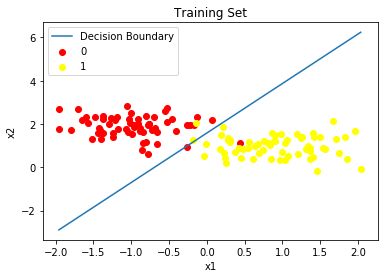

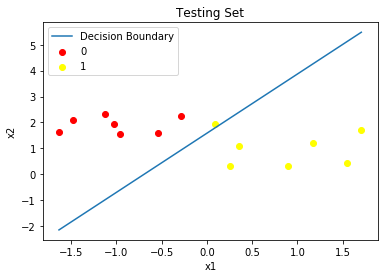

In [24]:
data_plot_reg(x_trn, y_trn, w, b, "Training Set")
data_plot_reg(x_tst, y_tst, w, b, "Testing Set")